## Monte Carlo - Euler Discretization - Part II

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

*Euler Discretization – continued.*

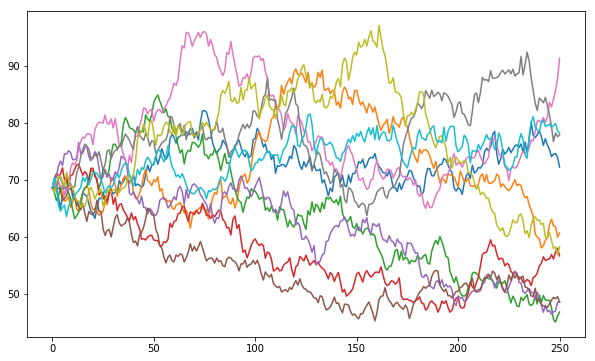

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

ticker = 'MSFT'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='google', start='2002-1-1')['Close']

log_returns = np.log(1 + data.pct_change())
stdev = log_returns.std() * 250 ** 0.5
stdev = stdev.values

r = 0.025
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in xrange(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])


plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

Use numpy.maximum to create a vector with as many elements as there are columns in the S matrix.

In [2]:
p = np.maximum(S[-1] - 110, 0)

In [3]:
p

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [4]:
p.shape

(10000L,)

Use the following formula to forecast the price of a stock option.

$$
C = \frac{exp(-r \cdot T) \cdot \sum{p_i}}{iterations}
$$

In [5]:
np.sum(p)

4992.5489374068875

In [6]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

0.48692824649394567

Because this pricing model is based on random iterations, you will obtain a different result every time you re-run the code in this document. Expand the “Kernel” list from the Jupyter menu and click on “Restart and run all”/”Restart & run all cells” to verify this is true.